import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
from geopy.geocoders import Nominatim
from sklearn.linear_model import LinearRegression
import folium
import re
import json
from pandas.io.json import json_normalize #transform JSON file into a pandas dataframe
from sklearn.cluster import KMeans
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
df=pd.read_csv("Rating Dataset .csv")
df.shape
df.head(10000)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing':percent_missing})

In [4]:
missing_values=df[(df['Aggregate rating'].isnull()) | (df['Aggregate rating']=='NEW') |(df['Aggregate rating']=='-')]
vx=df[(df['Aggregate rating'].notnull()) & (df['Aggregate rating']!='NEW') & (df['Aggregate rating']!='-')]

In [5]:
df['City']=df['City'].fillna('Quick Bites, Casual Dining')
df['Cuisines']=df['Cuisines'].fillna('North Indian, chinese, South Indian')
df['Locality']=df['Locality'].fillna('BTM')

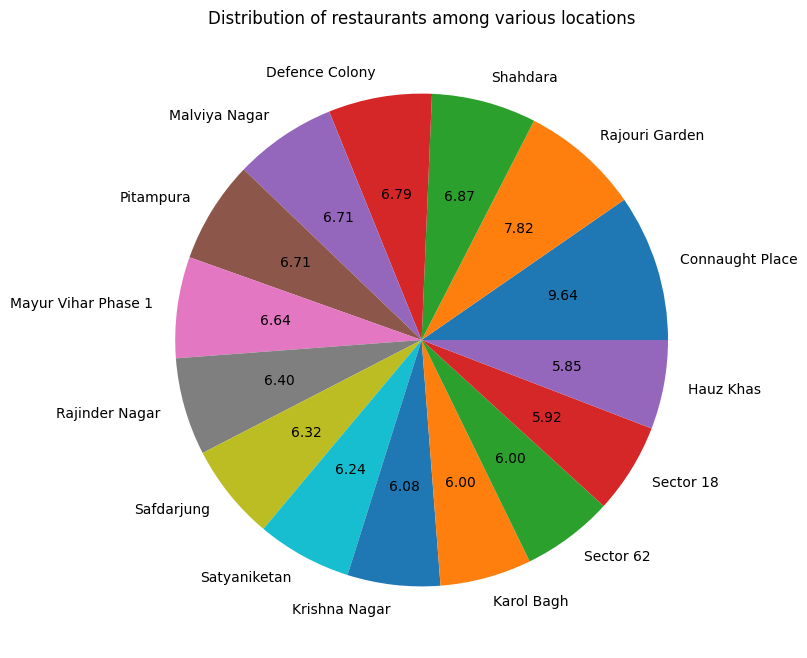

In [6]:
plt.figure(figsize=(10,8))
x = df.Locality.value_counts()[:15]
y = df['Locality'].value_counts()[:15].index
plt.pie(x, labels=y, autopct='%.2f')
plt.title('Distribution of restaurants among various locations')
plt.show()

Text(0, 0.5, 'Number of Restaurant')

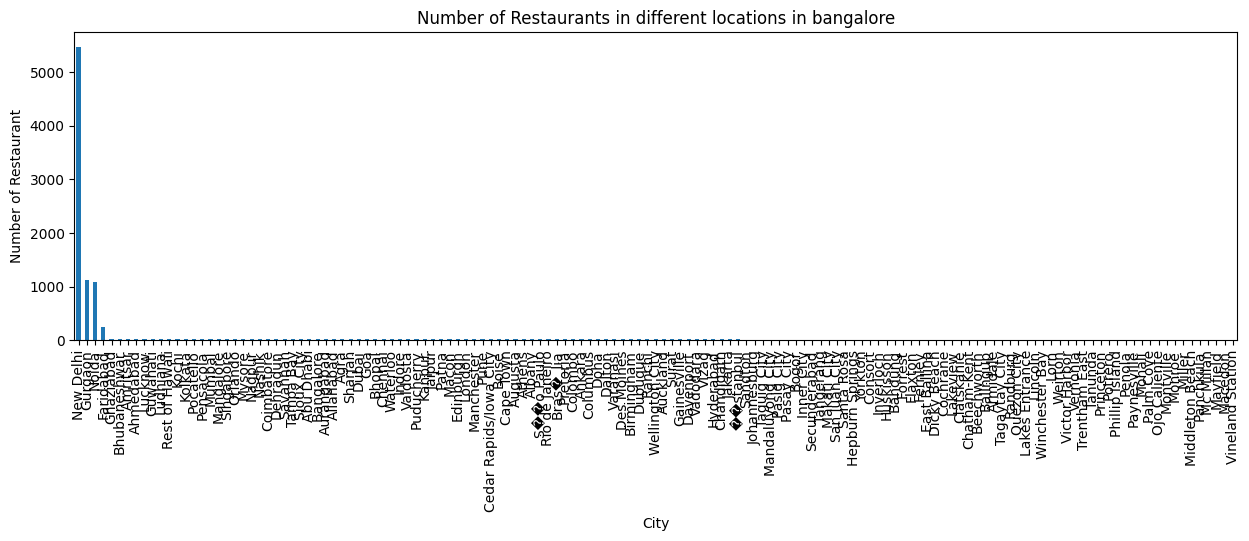

In [7]:
plt.figure(figsize=(15,4))
k =df['City'].value_counts()
k.plot(kind='bar')
plt.title('Number of Restaurants in different locations in bangalore')
plt.xlabel('City')
plt.ylabel('Number of Restaurant')

Text(0, 0.5, 'counts')

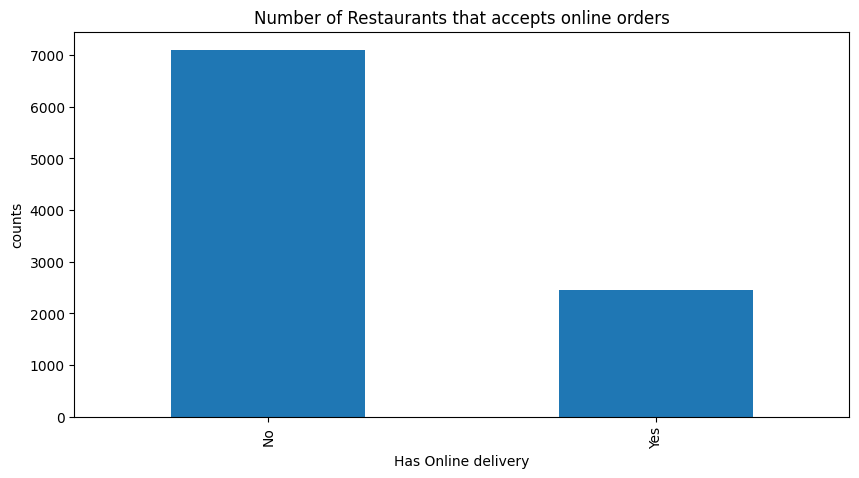

In [8]:
plt.figure(figsize=(10,5))
k =df['Has Online delivery'].value_counts()
k.plot(kind='bar')
plt.title('Number of Restaurants that accepts online orders')
plt.xlabel('Has Online delivery')
plt.ylabel('counts')

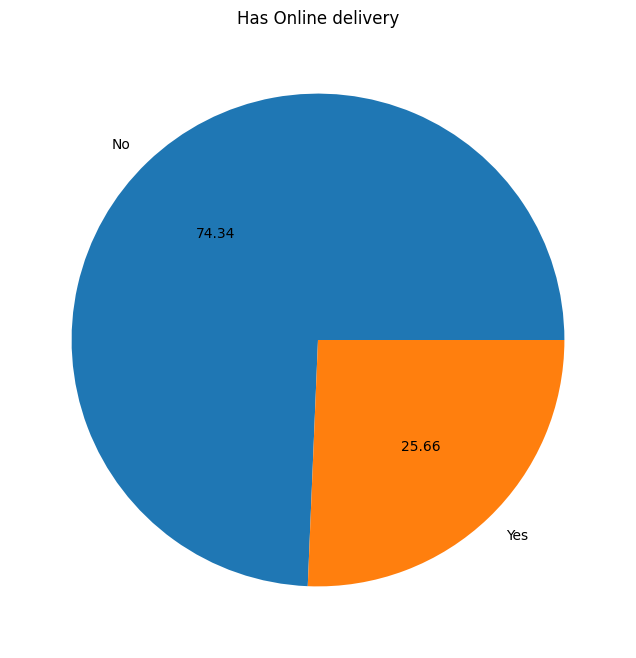

In [9]:
import matplotlib. pyplot as plt
plt.figure(figsize=(10,8))
x = df['Has Online delivery'].value_counts()[:15]
y = df['Has Online delivery'].value_counts()[:15].index
plt.pie(x, labels=y, autopct='%.2f')
plt.title('Has Online delivery')
plt.show()

Text(0, 0.5, 'No of Restaurants')

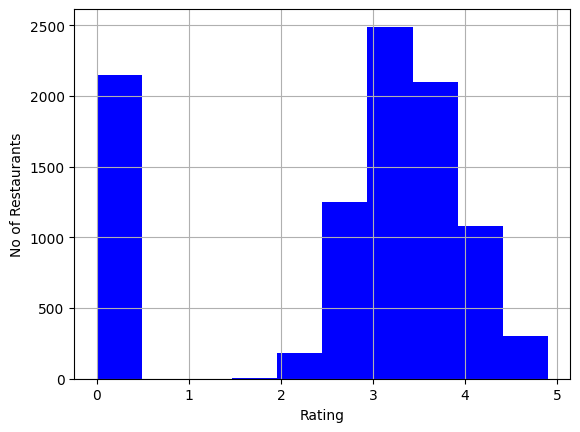

In [10]:
df['Aggregate rating'] = df['Aggregate rating'].apply(lambda r: float(r)) 
df['Aggregate rating'].hist(color='blue')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')

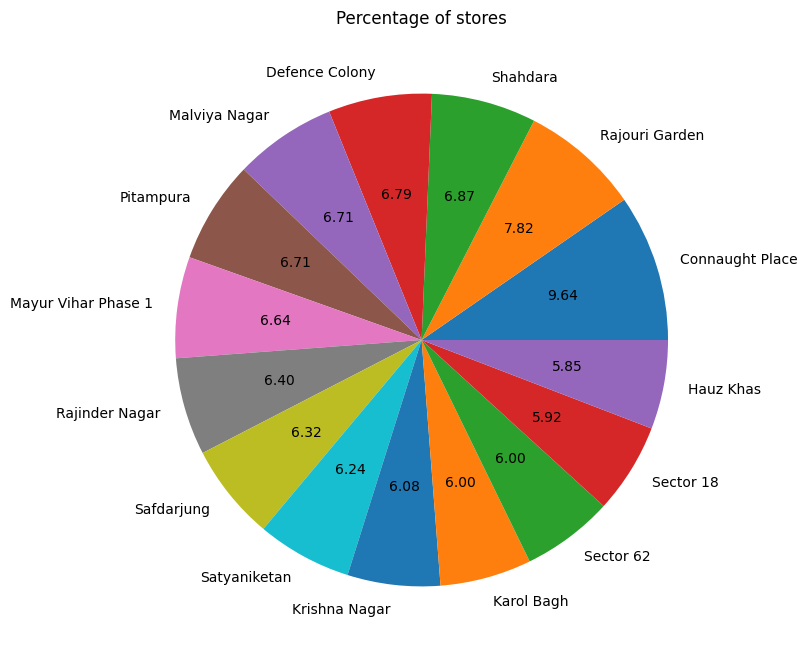

In [11]:
plt.figure(figsize=(10,8))
x = df.Locality.value_counts()[:15]
y = df['Locality'].value_counts()[:15].index
plt.pie(x, labels=y, autopct='%.2f')
plt.title('Percentage of stores')
plt.show()

Text(0.5, 1.0, 'Number of stores for each restaurant')

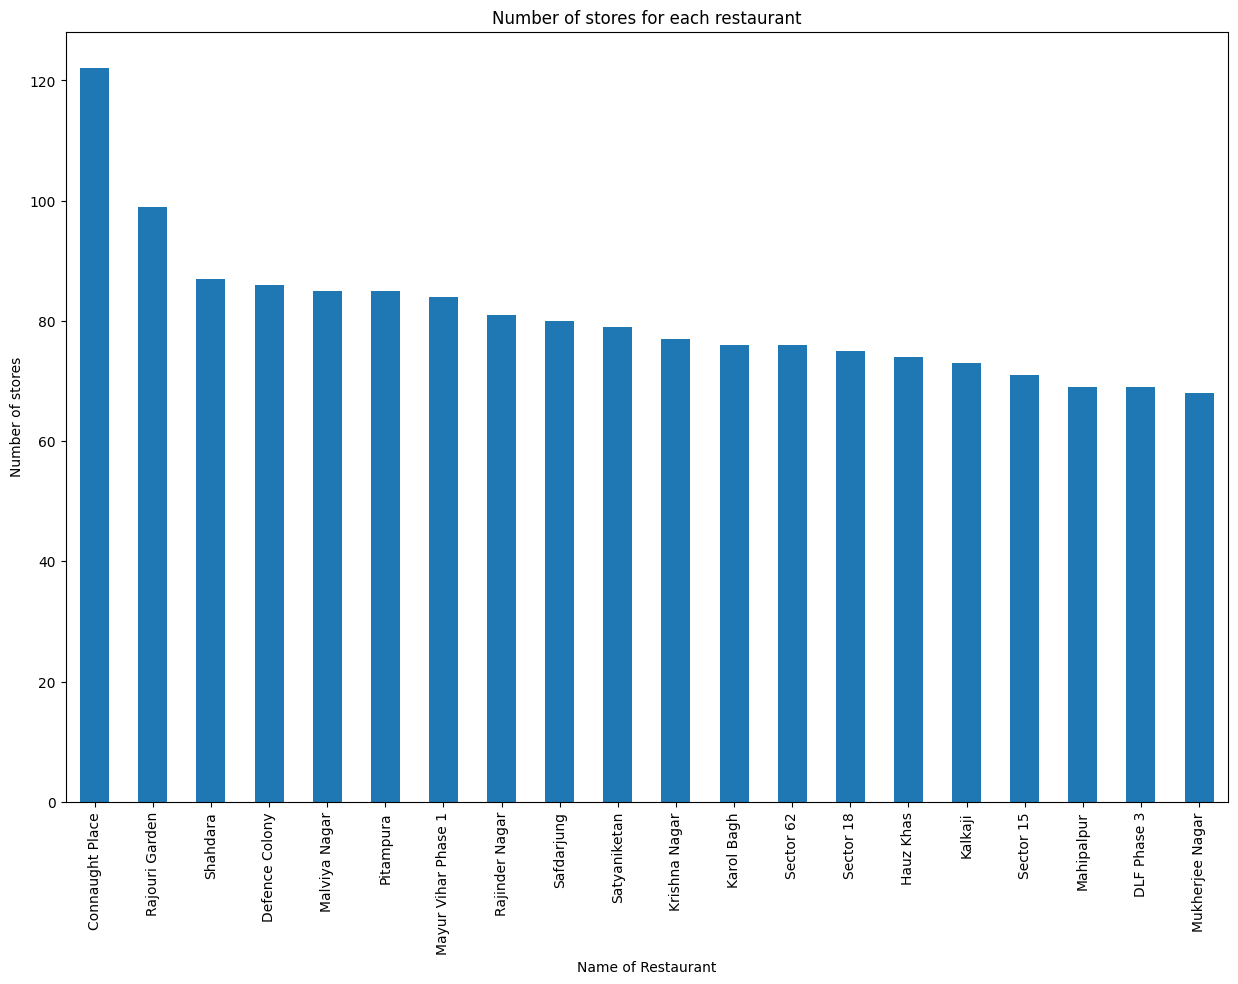

In [12]:
plt.figure(figsize = (15,10))
k = df.Locality.value_counts()[:20]
k.plot(kind = 'bar')
plt.xlabel("Name of Restaurant")
plt.ylabel("Number of stores")
plt.title("Number of stores for each restaurant")

Text(0.5, 0, 'Booking table')

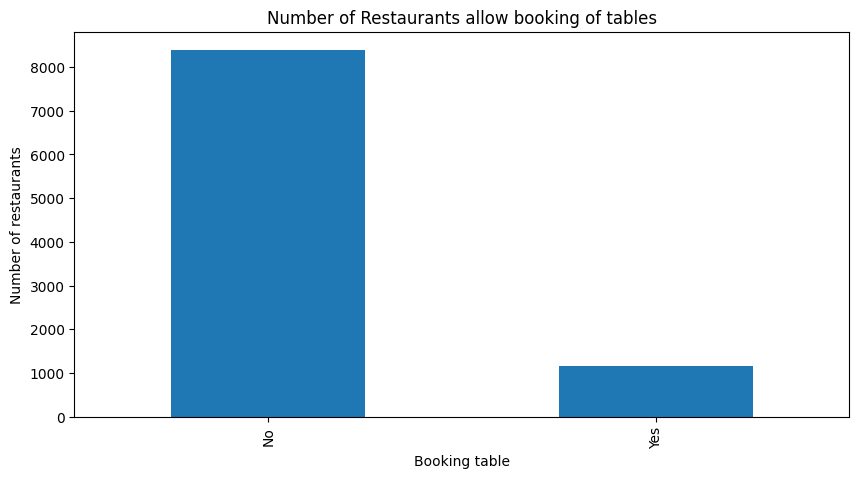

In [13]:
plt.figure(figsize=(10,5))
k =df['Has Table booking'].value_counts()
k.plot(kind='bar')
plt.title('Number of Restaurants allow booking of tables')
plt.ylabel('Number of restaurants')
plt.xlabel('Booking table')

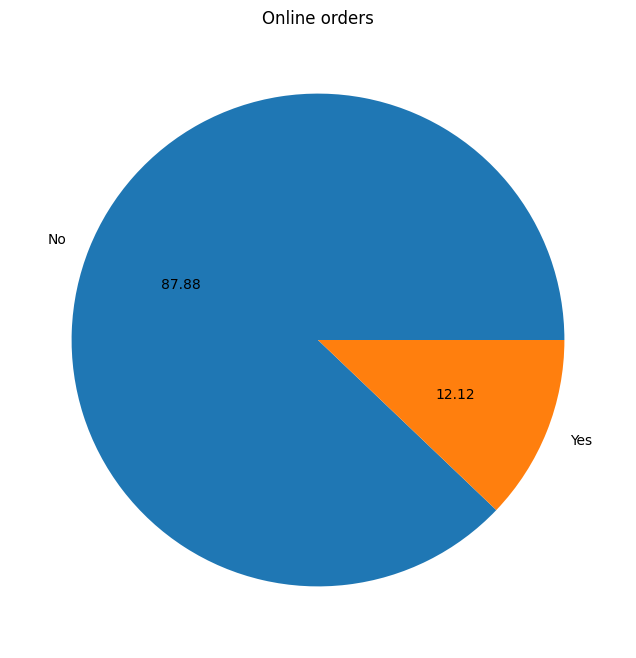

In [14]:
plt.figure(figsize=(10,8))
x = df['Has Table booking'].value_counts()
y = df['Has Table booking'].value_counts().index
plt.pie(x, labels=y, autopct='%.2f')
plt.title('Online orders')
plt.show()

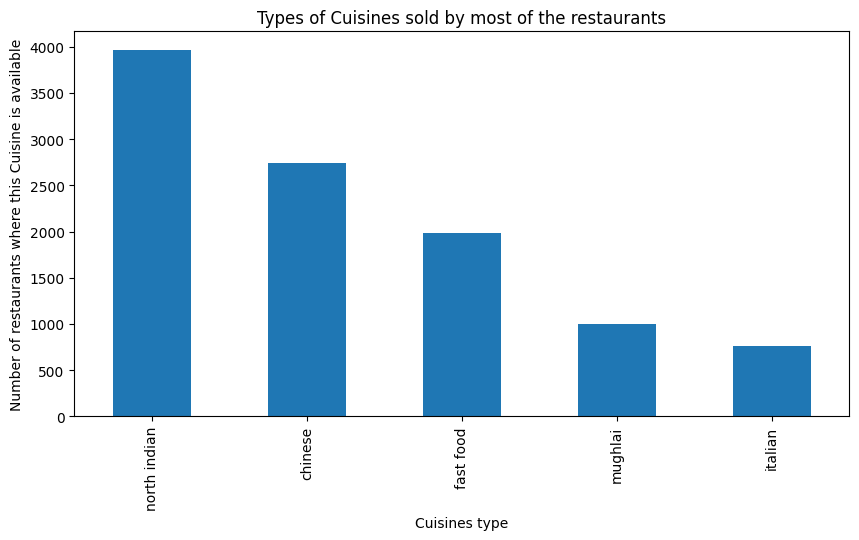

In [15]:
total = []
k = df[df['Cuisines'].notnull()]
k['Cuisines'] = k['Cuisines'].apply(lambda x: x.lower().strip())

for i in k['Cuisines']:
    for j in i.split(','):
        j = j.strip()
        total.append(j)

plt.figure(figsize=(10, 5)) 
a = pd.Series(total).value_counts()[:5]
a.plot(kind='bar')
plt.title('Types of Cuisines sold by most of the restaurants')
plt.xlabel('Cuisines type')
plt.ylabel('Number of restaurants where this Cuisine is available')
plt.show()


Text(0.5, 1.0, 'rating of restaurant vs online order')

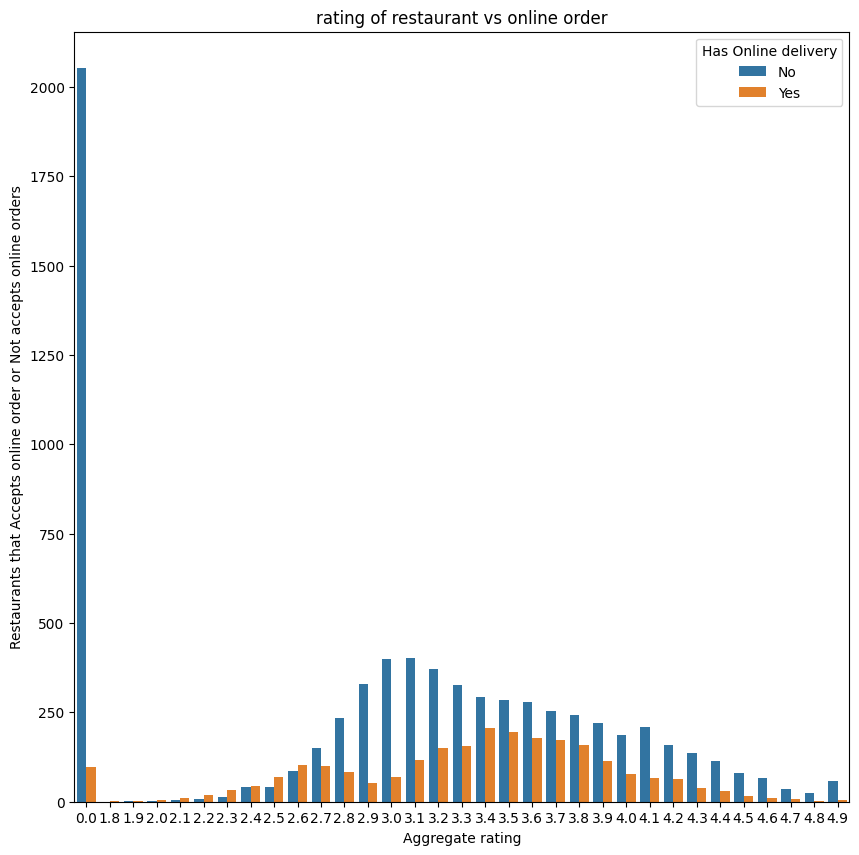

In [16]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.countplot(x=df['Aggregate rating'], hue = df['Has Online delivery'])
plt.ylabel("Restaurants that Accepts online order or Not accepts online orders")
plt.xlabel('Aggregate rating')
plt.title("rating of restaurant vs online order")

Text(0, 0.5, 'counts')

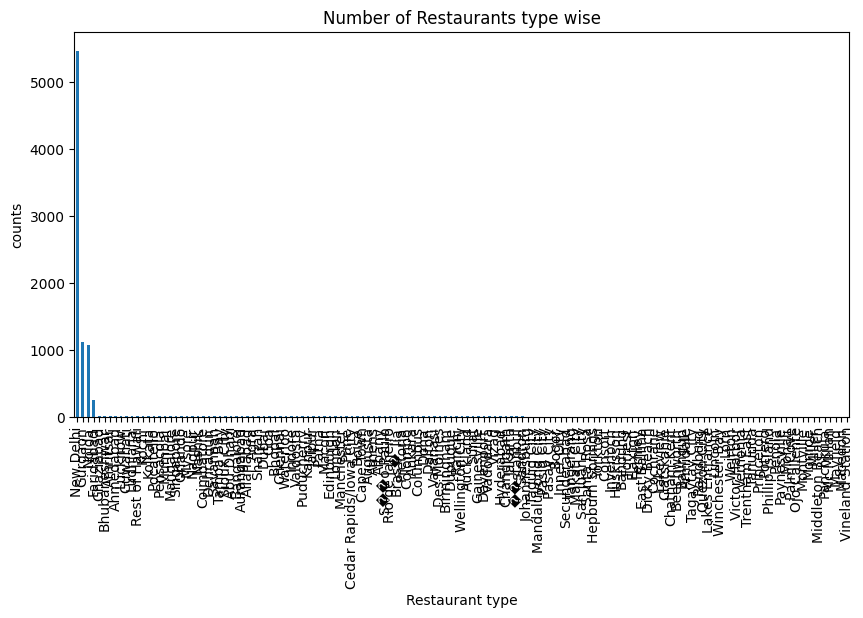

In [17]:
plt.figure(figsize=(10,5))
k =df['City'].value_counts()
k.plot(kind='bar')
plt.title('Number of Restaurants type wise')
plt.xlabel('Restaurant type')
plt.ylabel('counts')

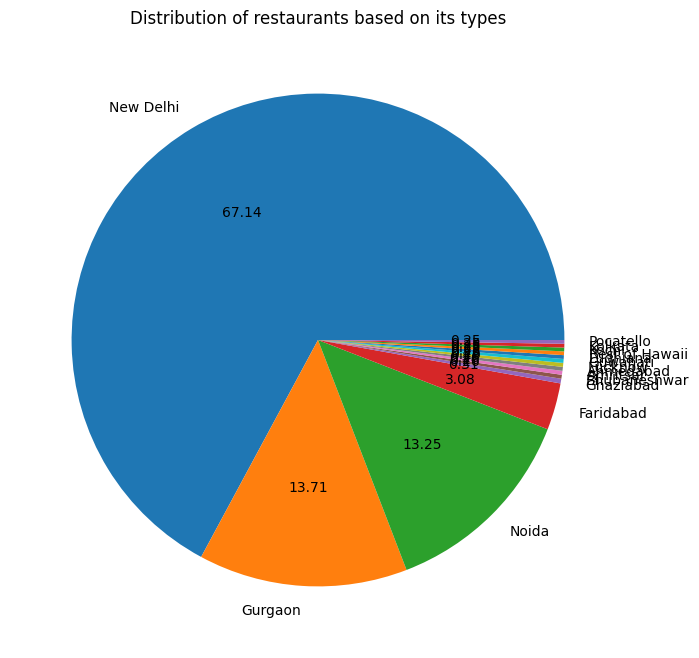

In [18]:
plt.figure(figsize=(10,8))
x = df['City'].value_counts()[:15]
y = df['City'].value_counts()[:15].index
plt.pie(x, labels=y, autopct='%.2f')
plt.title('Distribution of restaurants based on its types')
plt.show()

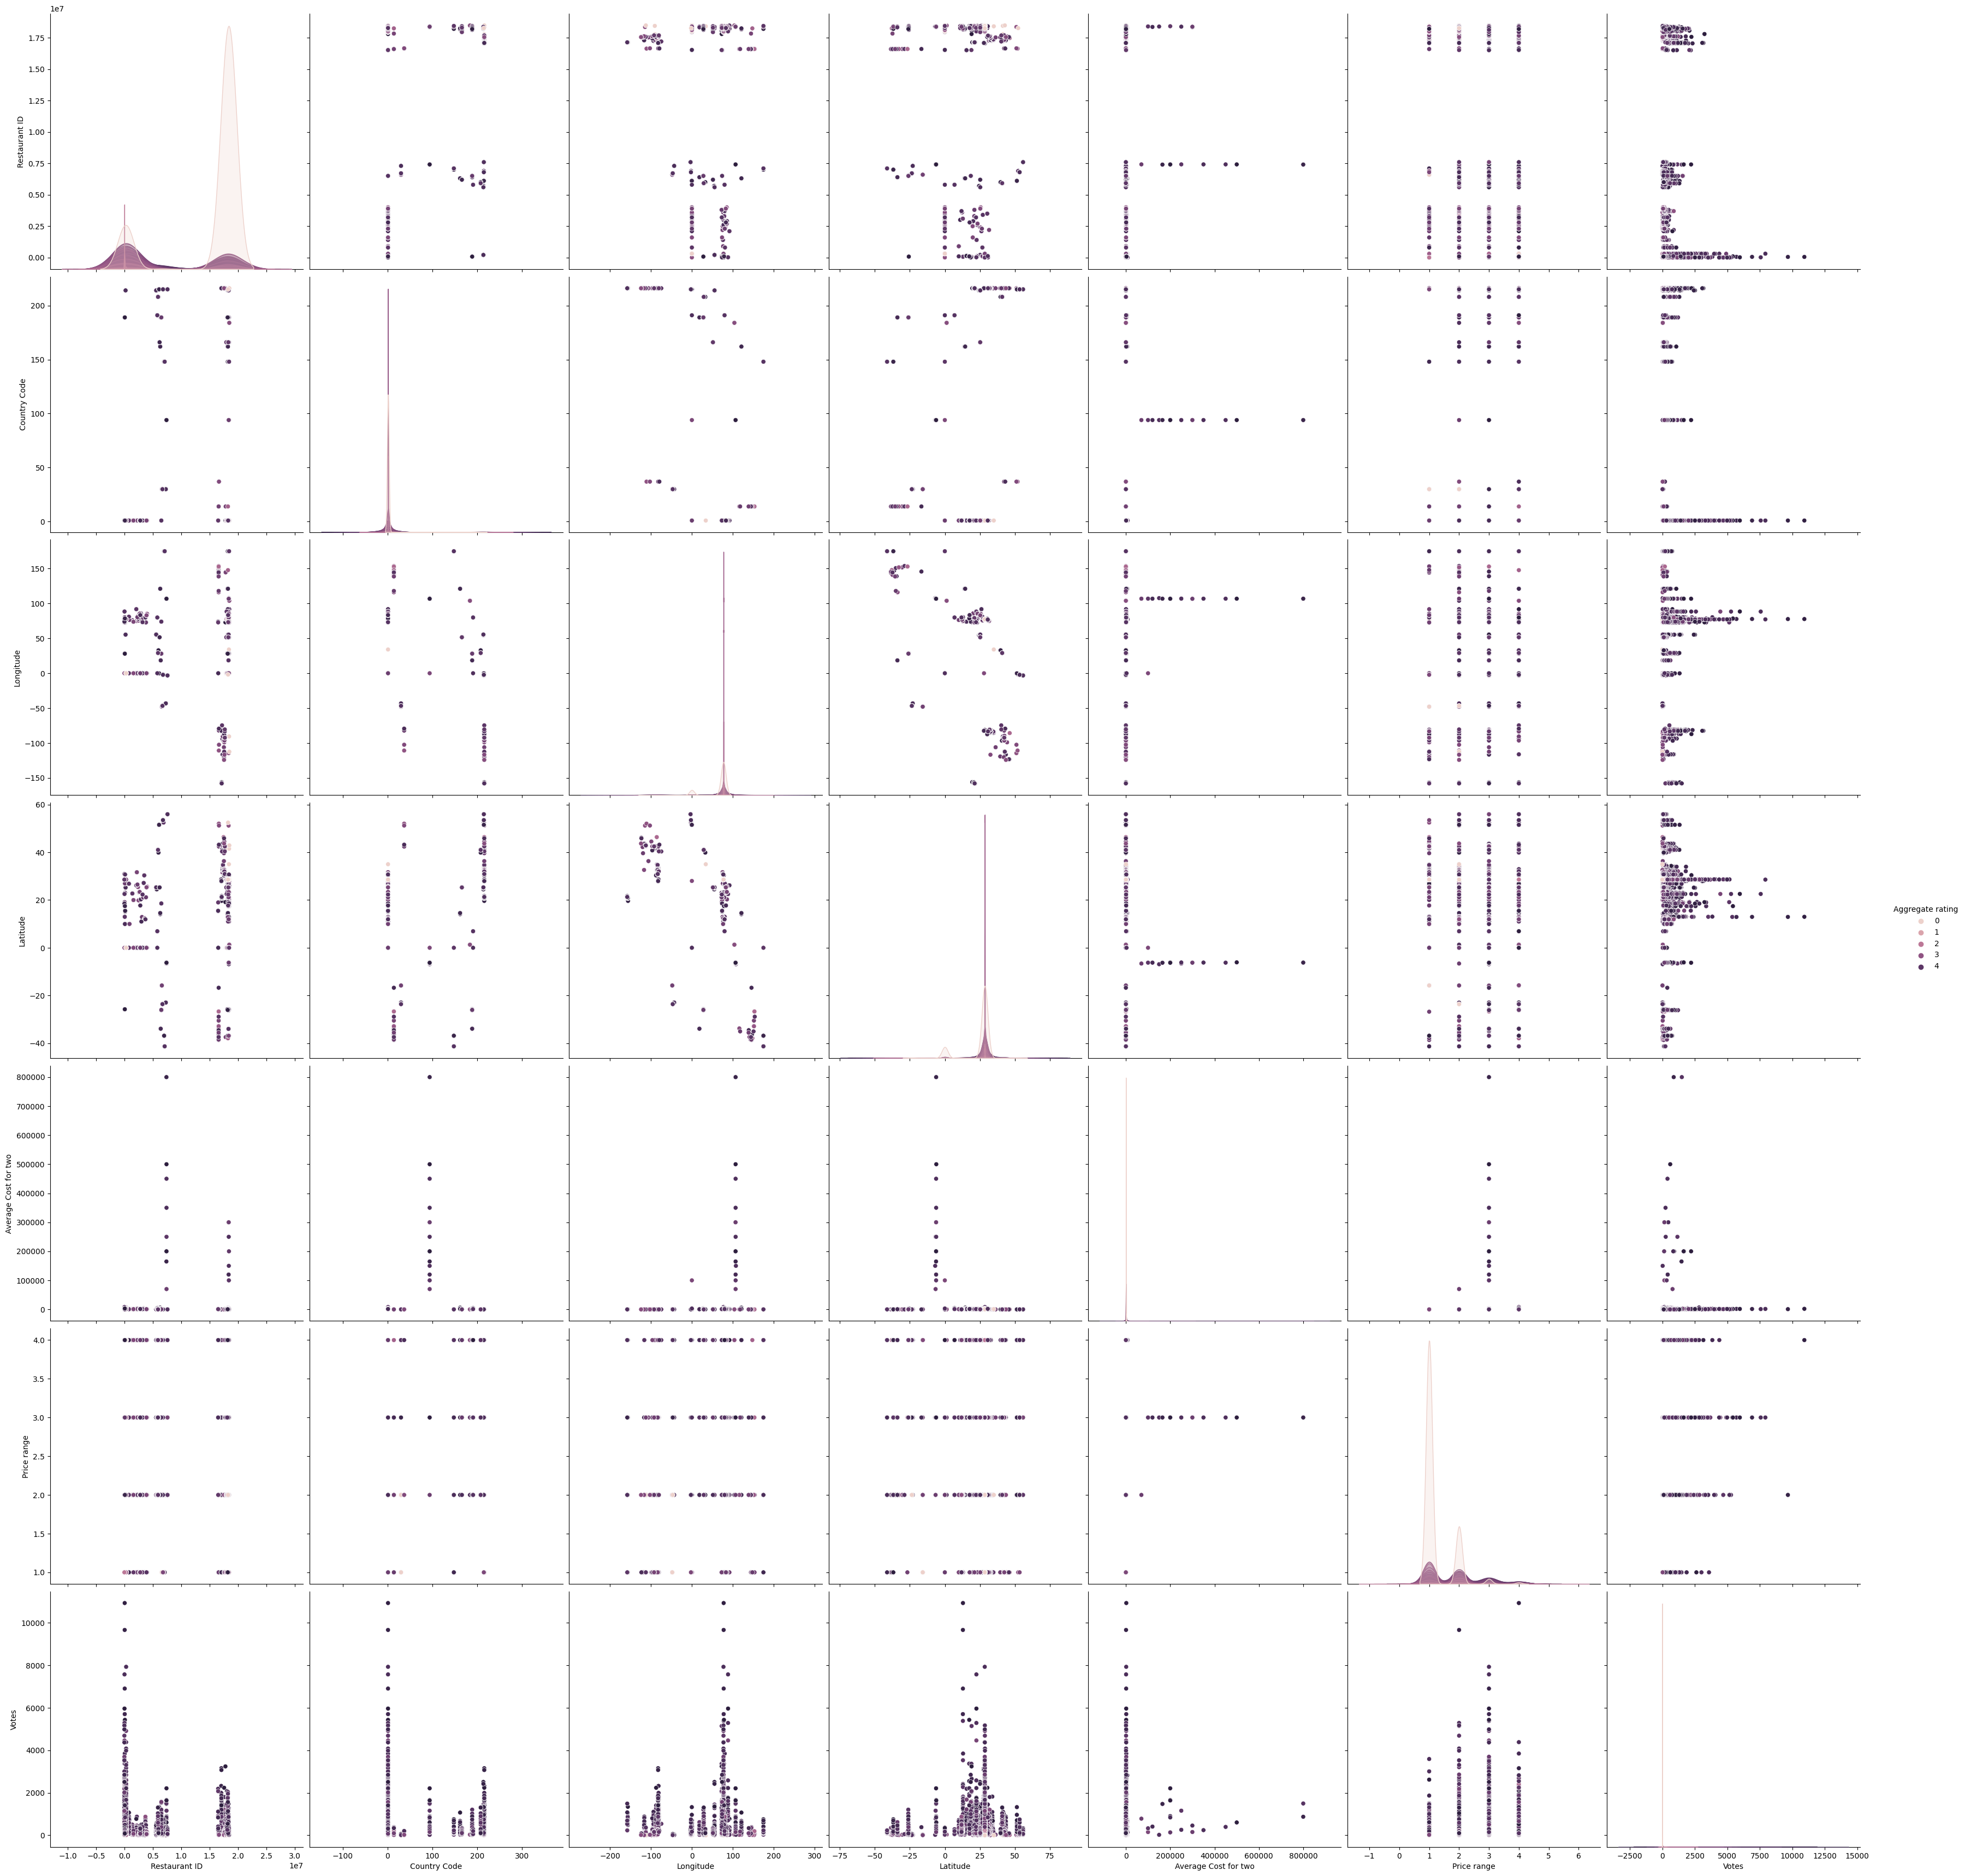

In [19]:
sns.pairplot(df,hue="Aggregate rating" ,height=5)

plt.show()

Text(0, 0.5, 'No of Restaurant')

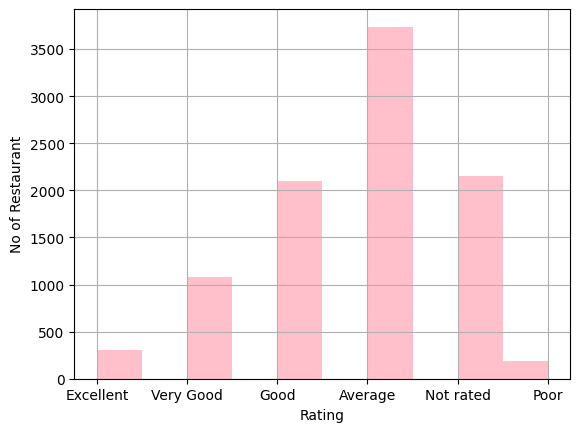

In [21]:
df['Rating text'] = df['Rating text'].apply(lambda r: str(r))
df['Rating text'].hist(color='pink')
plt.xlabel('Rating')
plt.ylabel('No of Restaurant')